# Um Sistema Inteligente e Justo: Definição aleatória para seleção do facilitador na Daily
--------------------------------------------------

Propomos a implementação de um script automatizado para a seleção do facilitador da daily. Este não é um sorteio comum; é um sistema ponderado e inteligente que opera sob um princípio simples e poderoso: **quanto menor a frequência com que uma pessoa facilitou, maior a sua chance de ser escolhida.**
Essa abordagem garante que, ao longo do tempo, todos os membros da equipe tenham a oportunidade de liderar a cerimônia, criando uma rotação equilibrada e dinâmica.

Benefícios Estratégicos para o Negócio
--------------------------------------

Adoção desta ferramenta vai além da simples automação. Ela catalisa uma série de benefícios culturais e operacionais que fortalecem a equipe e impulsionam a produtividade:
1.  **Cultura de Liderança e Corresponsabilidade:** Ao dar a todos a chance de facilitar, incentivamos uma cultura onde cada membro se sente corresponsável pelo sucesso da reunião. Isso desenvolve habilidades de comunicação, liderança e gestão de tempo em toda a equipe, e não apenas em alguns indivíduos.
    
2.  **Aumento do Engajamento e Inclusão:** A rotação justa e automática garante que todas as vozes sejam ouvidas em posição de destaque. Isso combate a passividade, aumenta o sentimento de pertencimento e torna o ambiente de trabalho mais inclusivo e participativo.
    
3.  **Eficiência e Foco Imediato:** Eliminamos a microdecisão diária de quem irá facilitar. A equipe pode iniciar a reunião com foco total no que realmente importa: a sincronia sobre o trabalho a ser feito, maximizando o valor de cada minuto investido.
    
4.  **Dinamismo e Novas Perspectivas:** Cada facilitador traz um estilo e uma energia únicos para a reunião. A rotação constante mantém as dailys frescas, dinâmicas e evita que se tornem um ritual mecânico e sem vida.

## Rodando para valer

### Como utilizar?
- Rodar célula Botão Play (>) da célula abaixo > Executar todos acima
- Somar 1 no valor para a pessoa que conduziu a Daily no dicionário name_frequencies

In [3]:
import sys
GIF_PATH = "rodando-girando-a-roda.gif"

sys.path.append("..")

Preparando para o sorteio...


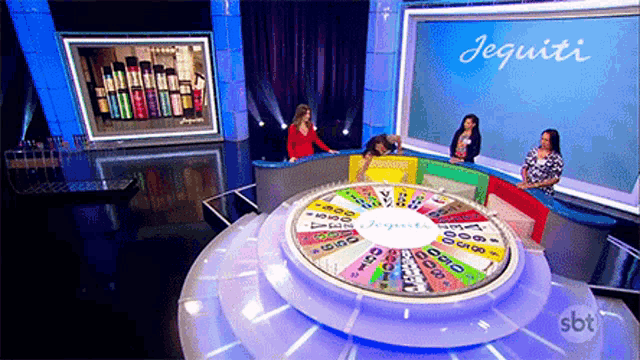

.....
E o selecionado é...
!!! Deyvid !!!
_______________________
--- Probabilidades ---
----------------------
Aline                  :|||||||
Deyvid                 :|||||||
Passeto                :|||||||||||||
Cristina, Fernanda     :|||||||||||||
Rayan                  :|||||||
Leandro                :|||||||||||||
Claudio                :|||||||||||||
Pina - o mestre da Yoga:|||||||||||||
Rabello - o marinheiro :|||||||||||||
Tocci                  :|||||||
_______________________


In [4]:
from seletor_aleatorio.utils import weighted_random_selection, suspense_selection, print_probabilities

name_frequencies = {
        'Aline': 2,
        'Deyvid': 2,
        'Passeto': 1,
        'Cristina, Fernanda': 1,
        'Rayan': 2,
        # 'Charizzard / Matuta': 2,
        # 'Oliveira': 2,
        'Leandro': 1,
        'Claudio': 1,
        # 'Pamela': 1,
        'Pina - o mestre da Yoga': 1,
        'Rabello - o marinheiro ': 1,
        # 'Rafa Machado': 2,
        'Tocci': 2,
        # 'Thaina': 1,
    }

# Run the selection
winner, inverse_weights = weighted_random_selection(name_frequencies)

# Display the result
suspense_selection(winner, img_pah=GIF_PATH)
print_probabilities(name_frequencies.keys(), inverse_weights)

### Simulando para provar que o sistema é justo e aleatório 

Através de uma simulação, conseguimos avaliar um cenário hipotético e observer o comportamento da seleção no longo prazo.

In [0]:
if True:
    num_runs = 100000
    update_weights = True
    name_frequencies = {
        'Tocci': 1,
        'Passeto': 100,
        'Fernanda': 1,
        'Charizzard': 1,
        'Claudio': 1
    }

    print("--- Rodando bootstrap ---")
    print(f"Data: {name_frequencies}\n")

    # Run the selection multiple times to demonstrate the weighting
    selections = {}
    q = int(num_runs / 5)

    for _ in range(num_runs):
        winner, inverse_weights = weighted_random_selection(name_frequencies)
        selections[winner] = selections.get(winner, 0) + 1

        if update_weights:
            name_frequencies[winner] += 1

        if (_ % q == 0) | (_ == num_runs - 1):
            print(f"--- Rodada {_} ---")
            print(f"--- Resultado após {_} seleções ---")
            print(selections)
            print(dict(zip(name_frequencies.keys(), inverse_weights)))
            # Sort results for clear presentation
            sorted_selections = dict(sorted(selections.items(), key=lambda item: item[1], reverse=True))
            for name, count in sorted_selections.items():
                percentage = (count / num_runs) * 100
                print(f"{name}: selecionado {count} vezes ({percentage:.2f}%)")



--- Rodando bootstrap ---
Data: {'Tocci': 1, 'Passeto': 100, 'Fernanda': 1, 'Charizzard': 1, 'Claudio': 1}

--- Rodada 0 ---
--- Resultado após 0 seleções ---
{'Charizzard': 1}
{'Tocci': 0.24937655860349126, 'Passeto': 0.0024937655860349127, 'Fernanda': 0.24937655860349126, 'Charizzard': 0.24937655860349126, 'Claudio': 0.24937655860349126}
Charizzard: selecionado 1 vezes (0.00%)
--- Rodada 20000 ---
--- Resultado após 20000 seleções ---
{'Charizzard': 4042, 'Claudio': 4004, 'Fernanda': 4023, 'Tocci': 4021, 'Passeto': 3911}
{'Tocci': 0.1999381478506687, 'Passeto': 0.2004864698717002, 'Fernanda': 0.19983877501376476, 'Charizzard': 0.1988996365707122, 'Claudio': 0.20083697069315423}
Charizzard: selecionado 4042 vezes (4.04%)
Fernanda: selecionado 4023 vezes (4.02%)
Tocci: selecionado 4021 vezes (4.02%)
Claudio: selecionado 4004 vezes (4.00%)
Passeto: selecionado 3911 vezes (3.91%)
--- Rodada 40000 ---
--- Resultado após 40000 seleções ---
{'Charizzard': 8030, 'Claudio': 8013, 'Fernanda': 